In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\Sadiya\Downloads\Advertising.csv")

In [4]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 1.Explain the dataset

In [4]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
data.shape

(200, 5)

Text(0.5, 1.0, ' Sales')

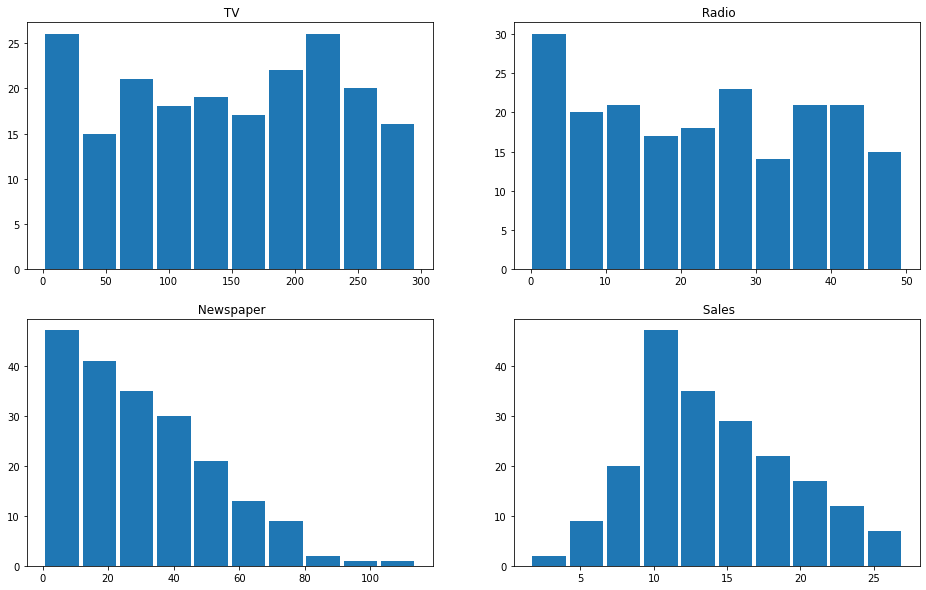

In [12]:
fig, axes = plt.subplots( figsize=(16, 10))
plt.subplot(2,2,1)
plt.hist(data['TV'],rwidth=0.9)
plt.title(' TV')
plt.subplot(2,2,2)
plt.hist(data['Radio'],rwidth=0.9)
plt.title(' Radio')
plt.subplot(2,2,3)
plt.hist(data['Newspaper'], rwidth=0.9)
plt.title(' Newspaper')
plt.subplot(2,2,4)
plt.hist(data['Sales'], rwidth=0.9)
plt.title(' Sales')

<AxesSubplot:>

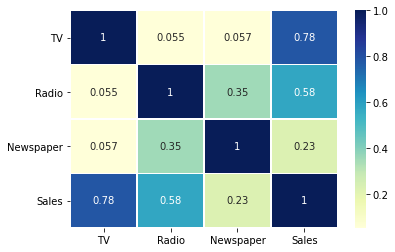

In [11]:
data1=data.drop(["Unnamed: 0"],axis=1)
corrmatrix=data1.corr()
sns.heatmap(corrmatrix,annot=True,linewidth=0.2,cmap="YlGnBu")

##### Insights
###### 1.the sales is normally distributed.Distribution of newspaper is positivly skewed.
###### 2.the advertisement through Tv plays a huge role in increse in sales.next comes the radio,and newspaper has least effect in sales

## 2. Check the summary statistics and discuss the max, min, avg, median,and percentiles.

In [13]:
data1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Insights
##### 1.the average amount spend on advertisement on Tv is higher than the others with a maximum value of 296.4.
##### 2.the least amount spend on advertisement is on radio with a maximum value of 114.
##### 3.even the 25% of amount on ads through tv is much higher than maximum amount of radio implying the ads through Tv is much important than others

### 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.
Null Hypothesis (H0): amount spent for the three advertisements are equal

Alternate Hypothesis (H1): amount spent for the three advertisements are not equal

Significance level,α= 0.05

In [14]:
from scipy.stats import f_oneway

In [15]:
df=pd.DataFrame(data)

In [16]:
f_oneway(df["TV"],df["Radio"],df["Newspaper"])

F_onewayResult(statistic=358.8514595342597, pvalue=4.552931539744962e-103)

In [19]:
pvalue=4.552931539744962e-103

In [17]:
stats.f.ppf(1-0.05,199,2)

19.490701052346367

In [20]:
if pvalue >= 0.05:
    print('Accept Null Hypothesis ')
else :
    print ('Reject Null Hypothesis')

Reject Null Hypothesis


Hence we can say that amount spend on three advertisement are different.